In [1]:
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

In [7]:
#data = xr.open_dataset(r'med-ogs-pft-an-fc-d_1637590581420.nc')
data = xr.open_dataset(r'biomassJunejulyaug.nc')
data

<xarray.Dataset>
Dimensions:    (time: 4, depth: 5, latitude: 120, longitude: 212)
Coordinates:
  * depth      (depth) float32 1.018 3.166 5.465 7.92 10.54
  * latitude   (latitude) float32 40.6 40.65 40.69 40.73 ... 45.48 45.52 45.56
  * time       (time) datetime64[ns] 2021-06-01 2021-07-01 2021-08-01 2021-09-01
  * longitude  (longitude) float32 6.417 6.458 6.5 6.542 ... 15.12 15.17 15.21
Data variables:
    zooc       (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
    phyc       (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:                     CF-1.0
    references:                      Please check in CMEMS catalogue the INFO...
    institution:                     OGS (Istituto Nazionale di Oceanografia ...
    source:                          3DVAR-OGSTM-BFM
    comment:                         Please check in CMEMS catalogue the INFO...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    bulletin_date:                   2021-12-14
    bulletin_type:                   analysis
    FROM_ORIGINAL_FILE__field_type:  monthly_mean_beginning_at_time_field
    title:                           Phytoplankton Carbon Biomass, Zooplankto...
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    history:                         Data extracted from dataset http://local...

In [8]:
lats = data.variables['latitude'][:]
lons = data.variables['longitude'][:]
time = data.variables['time'][:]
chlorof = data.variables['chl'][:]
zoopl = data.variables['zooc'][:]
phytopl = data.variables['phyc'][:]


In [4]:
mp = Basemap(projection='merc',
             llcrnrlon=6.4166675, 
             llcrnrlat=40.604168,
             urcrnrlon=15.208334,  
             urcrnrlat=45.5625, 
             resolution='f')
             
lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)

# mp = Basemap(projection='merc',
#              llcrnrlon=-5.5416665,  # 4.125,
#              llcrnrlat=30.1875,  # 33.1875,
#              urcrnrlon=36.291668,  # 20.291667938,
#              urcrnrlat=45.979168,  # 45.97916,
#              resolution='l')

<ipython-input-32-6eb2a9baa31a>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x, y, chlorof[3,0,:,:], cmap = 'jet')


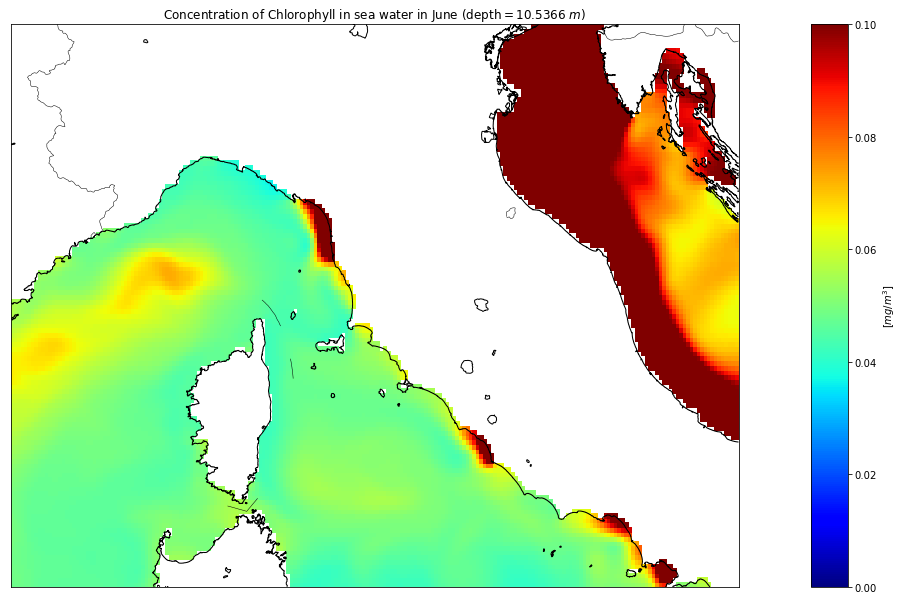

In [32]:
plt.figure(1, figsize=(15,11))

lon, lat = np.meshgrid(lons, lats)
x,y = mp(lon, lat)
c_scheme = mp.pcolor(x, y, chlorof[3,0,:,:], cmap = 'jet')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')
plt.clim(0, 0.1)
cbar.set_label('$[mg/m^3]$')
plt.title('Concentration of Chlorophyll in sea water in June (depth$=10.5366$ $m$)')

#plt.savefig(r'.\Images\Chlorofill.jpg', dpi=500)
plt.show()

<ipython-input-24-0158c3a739d0>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x, y, zoopl[0,4,:,:], cmap = 'jet')


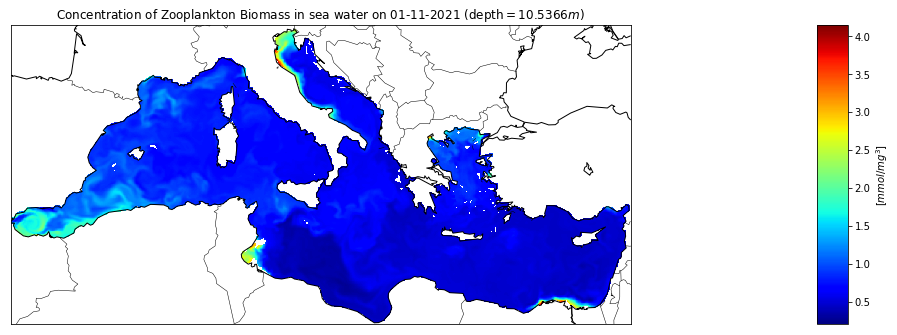

In [24]:
plt.figure(2, figsize=(15,11))

c_scheme = mp.pcolor(x, y, zoopl[0,4,:,:], cmap = 'jet')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme, location = 'right', pad = '30%')
cbar.set_label('$[mmol/mg^3]$')
plt.title('Concentration of Zooplankton Biomass in sea water on 01-11-2021 (depth$=10.5366 m$)')

#plt.savefig(r'.\Images\Zooplankton.jpg', dpi=500)
plt.show()